    # Default Perturbation network analysis notebook
    This notebook was automatically generated using freenrgworkflows
    Author: Antonia Mey
    Email: antonia.mey@ed.ac.uk

In [1]:
    %pylab inline
    import networkanalysis.networkanalysis as n_graph
    import networkanalysis.plotting as n_plot
    import networkanalysis.experiments as n_ex
    import networkanalysis.stats as n_stats
    import networkanalysis
    networkanalysis.__version__

Populating the interactive namespace from numpy and matplotlib


'1.1.0'

In [2]:
    # Creating and populating the perturbation network
    pG = n_graph.PerturbationGraph()
    # Change the path below to the csv file containing the individual perturbations
    pG.populate_pert_graph('group1/G1_QUBE_summary.csv')
    # Uncomment below if you have run multiple runs for some perturbations and add file path
    #pG.add_data_to_graph('/path/to/additional/runs.csv')
    target_compound = pG.compoundList[6] #change this to your target compound
    pG.compute_weighted_avg_paths(target_compound)
    pG.format_free_energies(merge_BM=True,intermed_ID='INT')
    computed_relative_DDGs = pG.freeEnergyInKcal
    print ("Free energies computed from the perturbation network are: ")
    print ("---------------------------------------- ")
    pG.write_free_energies(computed_relative_DDGs)

Free energies computed from the perturbation network are: 
---------------------------------------- 
#FREE ENERGIES ARE:
Lig1       0.787 +/- 0.228
Lig10      -3.286 +/- 0.290
Lig11      -2.368 +/- 0.509
Lig2       1.434 +/- 0.244
Lig3       0.407 +/- 0.290
Lig4       -0.213 +/- 0.257
Lig5       -0.000 +/- 0.000
Lig6       -2.024 +/- 0.806
Lig7       -3.015 +/- 0.794
Lig8       -2.064 +/- 0.766



    ### Experimental data
    It is useful to compare computed free energies to experimental data.
    The cells below will read in your experimental data. Just replace the path to you IC50 data in the
    `IC_50_file` variable 

In [3]:
    experiments = n_ex.ExperimentalData()
    IC_50_file = 'group1/Group1_ic50_exp.csv'
    experiments.compute_DDG_from_IC50s(IC_50_file, reference=target_compound)
    experimental_DDGs = experiments.freeEnergiesInKcal
    print ("Free energies computed from IC50 data: ")
    print ("---------------------------------------- ")
    pG.write_free_energies(experimental_DDGs)

Free energies computed from IC50 data: 
---------------------------------------- 
#FREE ENERGIES ARE:
Lig1       0.213 +/- 0.413
Lig2       0.478 +/- 0.413
Lig3       0.341 +/- 0.413
Lig4       0.213 +/- 0.413
Lig5       0.000 +/- 0.413
Lig6       0.321 +/- 0.413
Lig7       1.068 +/- 0.413
Lig8       0.906 +/- 0.413
Lig10      1.674 +/- 0.413
Lig11      -0.364 +/- 0.413



    ### Typical plots
    Below a bar plot and scatter plot template for comparing experimental and computed free energy values

['Lig1' 'Lig10' 'Lig11' 'Lig2' 'Lig3' 'Lig4' 'Lig5' 'Lig6' 'Lig7' 'Lig8']


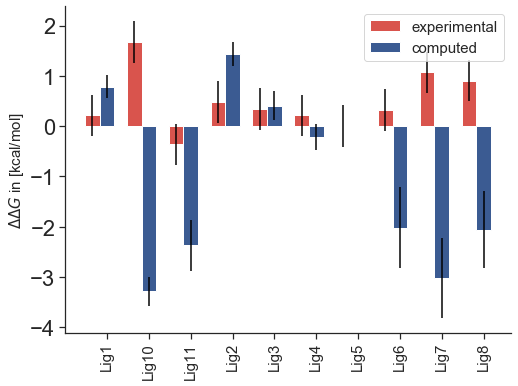

In [4]:
    plotter = n_plot.FreeEnergyPlotter(experimental_DDGs, computed_relative_DDGs)
    ax,fig = plotter.plot_bar_plot(legend=('experimental', 'computed'))

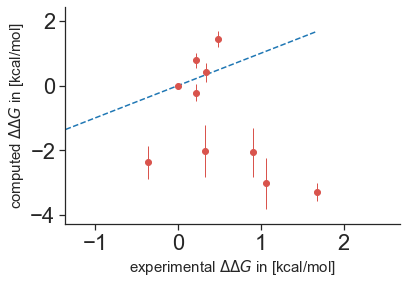

In [5]:
    plotter.plot_scatter_plot() 


    ### Error analysis on typical statistical measures: R_mean, MUE and Kendall tau_mean
    Below are examples of how to re-sample from the data in order to obtain error bars on correlation coefficients,
    mean unsigned errors and Kendall tau. Returned are confidence intervals of 65% and the median of the distribution.
     However, standard deviations and mean can also
    be returned, though less likely to give good information as these distributions are often heavily skewed and not
    normally distributed. 

In [6]:
    stats = n_stats.freeEnergyStats()
    stats.generate_statistics(computed_relative_DDGs,experimental_DDGs,repeats=10000)
    r_confidence = stats.R_confidence
    tau_confidence = stats.tau_confidence
    mue_confidence = stats.mue_confidence
    print ("R confidence is: %.2f < %.2f < %.2f" %(r_confidence[1], r_confidence[0], r_confidence[2]))
    print ("Mue confidence is: %.2f < %.2f < %.2f" %(mue_confidence[1], mue_confidence[0], mue_confidence[2]))
    print ("tau confidence is: %.2f < %.2f < %.2f" %(tau_confidence[1], tau_confidence[0], tau_confidence[2]))

R confidence is: -0.51 < -0.48 < -0.44
Mue confidence is: 1.78 < 1.85 < 1.93
tau confidence is: -0.27 < -0.22 < -0.18
